<a href="https://colab.research.google.com/github/flaviovdf/plottemplate/blob/main/PlotsACM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib --upgrade

In [2]:
# -*- coding: utf8

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 3.3 polegadas de largura, 1.65 * isso (golden ratio) altura
plt.rcParams['figure.figsize'] = (3.3, 3.3  / 1.65)

plt.rcParams['axes.axisbelow'] = True 
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = .5
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 5

In [4]:
plt.style.use('tableau-colorblind10') # use um estilo colorblind!
plt.ion()

In [5]:
data_nrm = np.random.normal(size=500)
data_plaw = np.random.zipf(1.5, size=500)

## Figura do tamanho de uma coluna

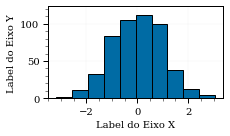

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(data_nrm, edgecolor='k')
ax.set(xlabel='Label do Eixo X', ylabel='Label do Eixo Y')
fig.tight_layout() # reduz espaço em branco nas laterais para quase 0
plt.savefig('fig1.pdf') # sempre salve como pdf!

## Uma página de **Largura**

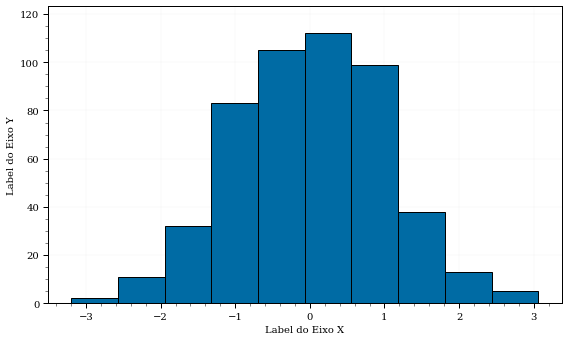

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8/1.65))
ax.hist(data_nrm, edgecolor='k')
ax.set(xlabel='Label do Eixo X', ylabel='Label do Eixo Y')
fig.tight_layout()
plt.savefig('fig2.pdf') # sempre salve como pdf!

## Exemplo de Scatter Plot de 1 coluna.
## Obserne como uso alpha, edgecolor
## Observe como coloco y e log devido aos dados

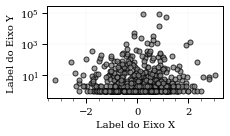

In [8]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data_nrm, data_plaw,
           color='grey',
           edgecolor='k',
           alpha=0.75)
ax.set(xlabel='Label do Eixo X',
       ylabel='Label do Eixo Y',
       yscale='log')
fig.tight_layout()

## Exemplo com subplots mostrando os histogramas

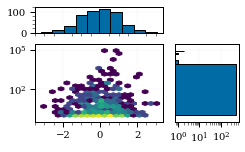

In [9]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)


axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AA.
    CCD
    CCD
    CCD
    """
)
axd['A'].hist(data_nrm, edgecolor='k')
axd['A'].tick_params(top=False, bottom=False, left=True, right=False,
                     labelleft=True, labelbottom=False)

axd['D'].hist(data_plaw, log=True, edgecolor='k', orientation='horizontal')
axd['D'].set_xscale('log')
axd['D'].set_yscale('log')
axd['D'].tick_params(top=False, bottom=True, left=False, right=False,
                     labelleft=False, labelbottom=True)

axd['C'].hexbin(data_nrm, data_plaw,
                bins='log', gridsize=20,
                xscale='linear', yscale='log')

fig.tight_layout()

# Cores, cores, cores

## Colormaps

Leia: https://matplotlib.org/stable/tutorials/colors/colormaps.html e tente usar perceptually uniform para dados numéricos.

Tente usar cores que ajudam o usuário.

Observe como o mapa de cores JET (RUIM!) não diferencia bem uma sequencia de 20 até 100. A diferença de cores deveria ser uniforme.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


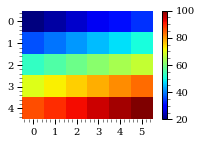

In [10]:
D = np.linspace(20, 100, 30).reshape((5, 6))
im = ax.imshow(D)

cm = plt.get_cmap('jet')

fig, ax = plt.subplots(1, 1)
im = ax.imshow(D, cmap=cm)
fig.colorbar(im, ax=ax)

for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.grid(False)

O magma, magma_r, viridis e outros já funcionam bem!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


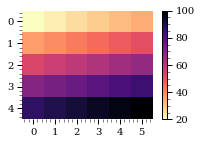

In [11]:
D = np.linspace(20, 100, 30).reshape((5, 6))
im = ax.imshow(D)

cm = plt.get_cmap('magma_r')

fig, ax = plt.subplots(1, 1)
im = ax.imshow(D, cmap=cm)
fig.colorbar(im, ax=ax)

for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.grid(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


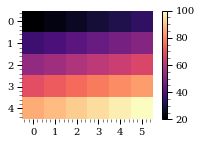

In [12]:
D = np.linspace(20, 100, 30).reshape((5, 6))
im = ax.imshow(D)

cm = plt.get_cmap('magma')

fig, ax = plt.subplots(1, 1)
im = ax.imshow(D, cmap=cm)
fig.colorbar(im, ax=ax)

for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.grid(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


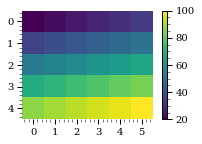

In [13]:
D = np.linspace(20, 100, 30).reshape((5, 6))
im = ax.imshow(D)

cm = plt.get_cmap('viridis')

fig, ax = plt.subplots(1, 1)
im = ax.imshow(D, cmap=cm)
fig.colorbar(im, ax=ax)

for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.grid(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


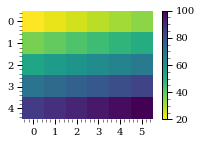

In [14]:
D = np.linspace(20, 100, 30).reshape((5, 6))
im = ax.imshow(D)

cm = plt.get_cmap('viridis_r')

fig, ax = plt.subplots(1, 1)
im = ax.imshow(D, cmap=cm)
fig.colorbar(im, ax=ax)

for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.grid(False)

## Em dados categóricos

Podemos usar cores que ajudam o usuário. Abaixo eu quero que as cdfs mais perto tenham cores parecidas.

In [15]:
g1a = np.random.normal(loc=1, size=1000)
g1b = np.random.normal(loc=1.5, size=1000)

g2a = np.random.normal(loc=3, size=1000)
g2b = np.random.normal(loc=3.5, size=1000)

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
cdf1a = ECDF(g1a)
cdf1b = ECDF(g1b)

cdf2a = ECDF(g2a)
cdf2b = ECDF(g2b)

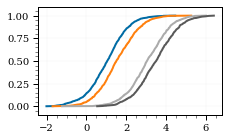

In [18]:
fig, ax = plt.subplots(1, 1)
ax.plot(cdf1a.x, cdf1a.y)
ax.plot(cdf1b.x, cdf1b.y)

ax.plot(cdf2a.x, cdf2a.y)
ax.plot(cdf2b.x, cdf2b.y)

Vamos usar o cmap paired para ajudar

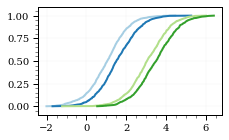

In [19]:
fig, ax = plt.subplots(1, 1)

cm = plt.get_cmap('Paired').colors

ax.plot(cdf1a.x, cdf1a.y, color=cm[0])
ax.plot(cdf1b.x, cdf1b.y, color=cm[1])

ax.plot(cdf2a.x, cdf2a.y, color=cm[2])
ax.plot(cdf2b.x, cdf2b.y, color=cm[3])

In [20]:
## ou!

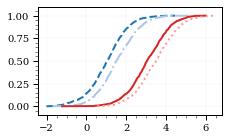

In [21]:
fig, ax = plt.subplots(1, 1)

cm = plt.get_cmap('tab20').colors

ax.plot(cdf1a.x, cdf1a.y, color=cm[0], ls='--')
ax.plot(cdf1b.x, cdf1b.y, color=cm[1], ls='-.')

ax.plot(cdf2a.x, cdf2a.y, color=cm[6], ls='-')
ax.plot(cdf2b.x, cdf2b.y, color=cm[7], ls=':')